In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns



In [2]:
df=pd.read_csv("data_proyecto.csv")
df

,property_type,bathroom,num_room,floor_num,years_old,built_area,ground_area,parking,bool_parking,elevator,...,gray_work,balcony_area,bool_balcony,bool_deposit,bool_gym,bool_laundry_area,bool_obra_gris,bool_last_floor,bool_pool,floors_number
0,departamento_en_condominio_o_unidad_habitacional,2.0,3.0,2,24.0,70,70,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,departamento_en_condominio_o_unidad_habitacional,1.0,3.0,5,19.0,66,66,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,departamento_en_condominio_o_unidad_habitacional,2.0,3.0,3,14.0,300,300,2,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,departamento_en_condominio_o_unidad_habitacional,2.0,2.0,1,1.0,70,70,2,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,departamento_en_condominio_o_unidad_habitacional,2.0,3.0,3,20.0,106,106,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,casa_sola,4.0,6.0,1,39.0,300,324,2,1,0.0,...,0,0,0,0,0,0,0,0,0,0
149996,departamento_en_condominio_o_unidad_habitacional,1.0,2.0,2,30.0,60,60,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
149997,casa_sola,1.0,4.0,1,70.0,200,170,0,0,0.0,...,1,0,0,0,0,0,1,0,0,0
149998,casa_en_condominio,1.0,1.0,1,12.0,32,32,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.isnull().sum()

property_type           0
bathroom              550
num_room              587
floor_num               0
years_old              19
built_area              0
ground_area             0
parking                 0
bool_parking            0
elevator             4747
precio                  0
latitude                0
longitude               0
localidad               0
ciudad                  0
gray_work               0
balcony_area            0
bool_balcony            0
bool_deposit            0
bool_gym                0
bool_laundry_area       0
bool_obra_gris          0
bool_last_floor         0
bool_pool               0
floors_number           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   property_type      150000 non-null  object 
 1   bathroom           149450 non-null  float64
 2   num_room           149413 non-null  float64
 3   floor_num          150000 non-null  int64  
 4   years_old          149981 non-null  float64
 5   built_area         150000 non-null  int64  
 6   ground_area        150000 non-null  int64  
 7   parking            150000 non-null  int64  
 8   bool_parking       150000 non-null  int64  
 9   elevator           145253 non-null  float64
 10  precio             150000 non-null  float64
 11  latitude           150000 non-null  float64
 12  longitude          150000 non-null  float64
 13  localidad          150000 non-null  object 
 14  ciudad             150000 non-null  object 
 15  gray_work          150000 non-null  int64  
 16  ba

In [5]:
print(df.shape)
df.describe()


(150000, 25)


,bathroom,num_room,floor_num,years_old,built_area,ground_area,parking,bool_parking,elevator,precio,...,gray_work,balcony_area,bool_balcony,bool_deposit,bool_gym,bool_laundry_area,bool_obra_gris,bool_last_floor,bool_pool,floors_number
count,1.494500e+05,1.494130e+05,1.500000e+05,1.499810e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,145253.000000,1.500000e+05,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,2.874029e+04,1.125313e+02,1.437632e+04,-2.017656e+02,3.639446e+02,3.697078e+02,1.353340,0.866893,0.136858,2.565663e+68,...,0.042693,1.246167,0.017387,0.037220,0.005113,0.016193,0.042693,0.030600,0.001373,0.001307
std,7.855891e+06,3.889711e+04,5.544801e+06,6.181415e+04,5.484848e+04,5.504017e+04,1.151442,0.339691,0.343698,9.936769e+70,...,0.202165,273.702561,0.130708,0.189301,0.071325,0.126219,0.202165,0.172232,0.037033,0.045000
min,0.000000e+00,0.000000e+00,1.000000e+00,-2.019918e+07,2.000000e+01,-1.000000e+00,0.000000,0.000000,0.000000,1.000000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+00,2.000000e+00,1.000000e+00,7.000000e+00,6.200000e+01,6.200000e+01,1.000000,1.000000,0.000000,1.100000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000e+00,3.000000e+00,1.000000e+00,1.500000e+01,9.200000e+01,9.000000e+01,1.000000,1.000000,0.000000,2.175000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000e+00,3.000000e+00,2.000000e+00,3.000000e+01,1.580000e+02,1.400000e+02,2.000000,1.000000,0.000000,3.500000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.147484e+09,1.500000e+07,2.147484e+09,9.110000e+02,1.992556e+07,1.992556e+07,203.000000,1.000000,1.000000,3.848494e+73,...,1.000000,99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


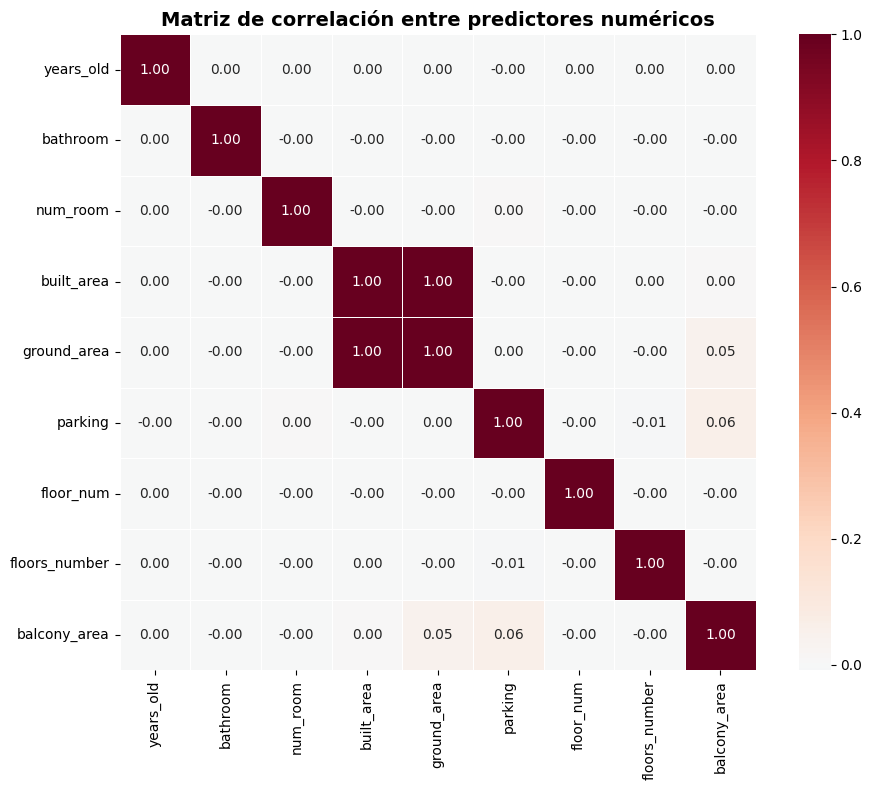

In [7]:
# Selección de variables numéricas relevantes
cols_num = [
    'years_old',
    'bathroom',
    'num_room',
    'built_area',
    'ground_area',
    'parking',
    'floor_num',
    'floors_number',
    'balcony_area'
]

# Matriz de correlación
corr_mat = df[cols_num].corr()

# Correlograma
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    corr_mat,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    ax=ax
)

ax.set_title('Matriz de correlación entre predictores numéricos',
             fontsize=14,
             fontweight='bold')

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/8t/d100yqrn4xn1qyg525nsgxs00000gp/T/ipykernel_27976/2411895306.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()  # quitamos leyenda redundante


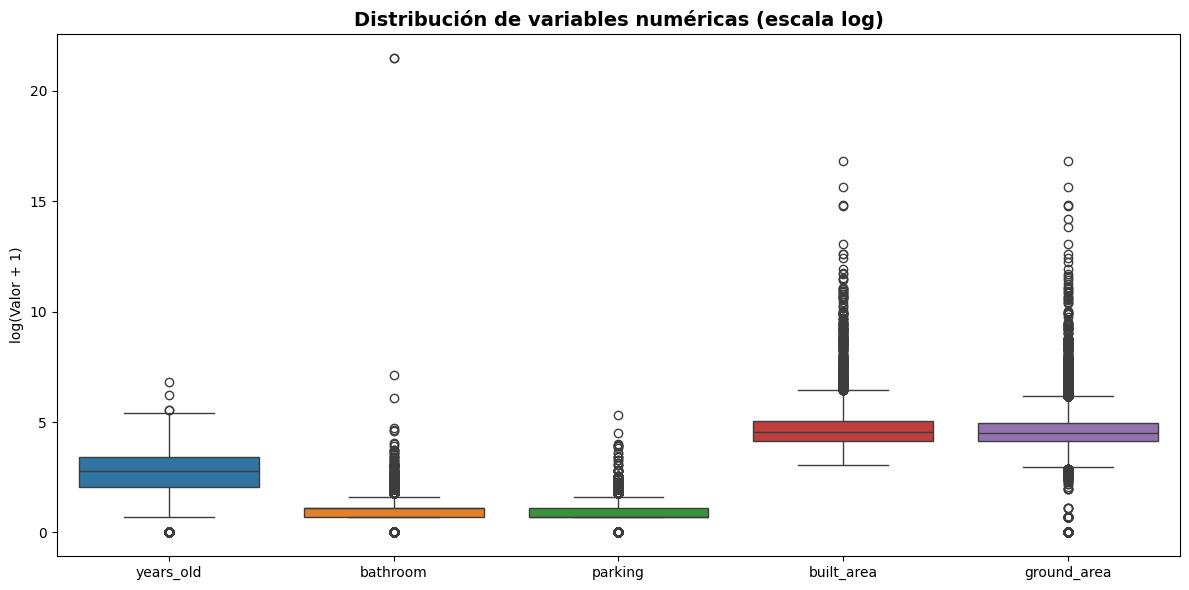

In [8]:
cols_num = [
    'years_old',
    'bathroom',
    'parking',
    'built_area',
    'ground_area'
]

# Convertimos a formato largo
eda_lags = df[cols_num].melt(var_name='Variable', value_name='Valor')

# Aplicamos log1p antes de graficar (más limpio)
eda_lags['Valor_log'] = np.log1p(eda_lags['Valor'])

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(
    data=eda_lags,
    x='Variable',
    y='Valor_log',
    hue='Variable',
    dodge=False,
    ax=ax
)

ax.set_title('Distribución de variables numéricas (escala log)', 
             fontsize=14, 
             fontweight='bold')

ax.set_ylabel('log(Valor + 1)')
ax.set_xlabel('')

ax.legend().remove()  # quitamos leyenda redundante

plt.tight_layout()
plt.show()

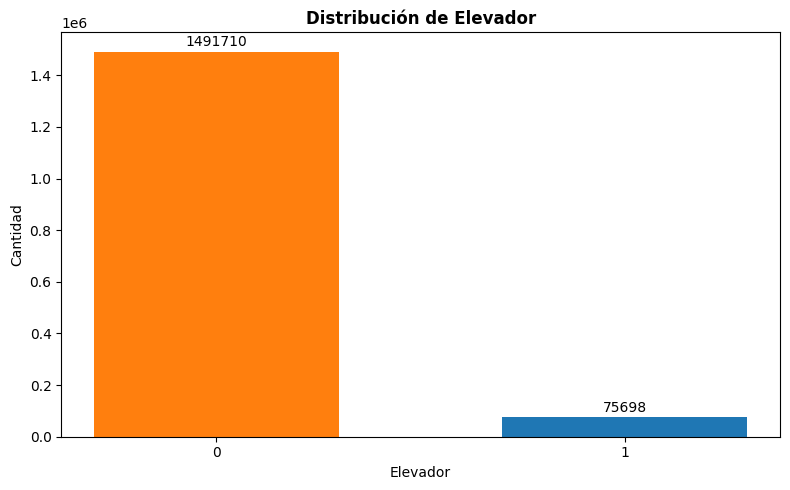

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

urban = df['elevador'].value_counts().sort_index()
ax.bar(urban.index, urban.values, color=['#ff7f0e', '#1f77b4'], width=0.6)
ax.set_title('Distribución de Elevador', fontsize=12, fontweight='bold')
ax.set_xlabel('Elevador')
ax.set_ylabel('Cantidad')
ax.set_xticks([0, 1])
for i, v in enumerate(urban.values):
    ax.text(i, v + 20000, str(v), ha='center')
plt.tight_layout()
plt.show()

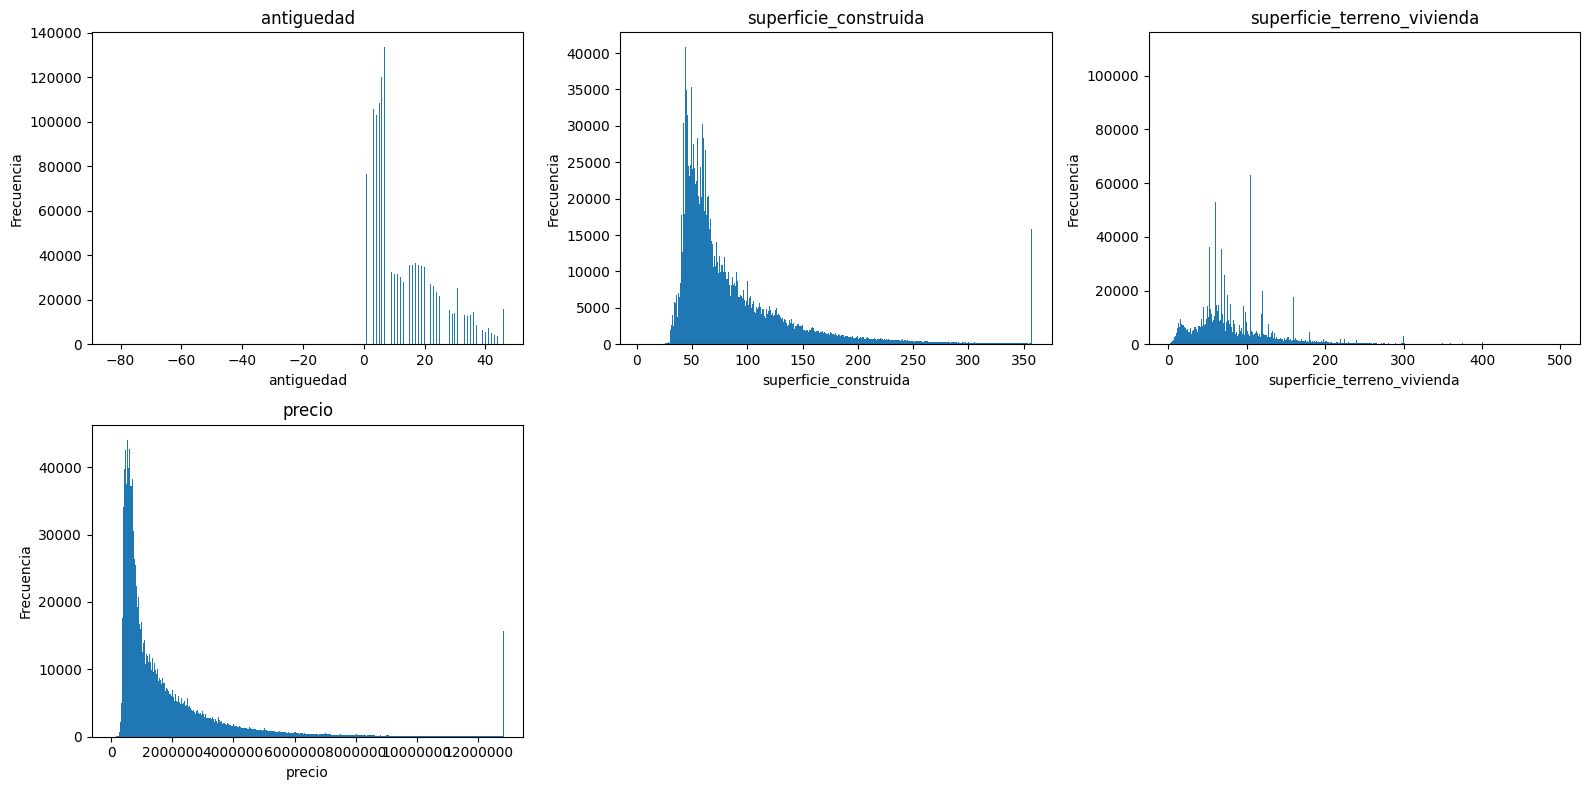

In [30]:

# Variables a graficar
cols = [
    'antiguedad',
    'superficie_construida',
    'superficie_terreno_vivienda',
    'precio'
]

# Recorte superior para que se vea la distribución (evita que outliers aplasten el histograma)
p = 0.99  

# Layout: 2 filas x 3 columnas (mucho más legible que 1x6)
ncols = 3
nrows = int(np.ceil(len(cols) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    x = df[col].dropna()

    # Recorte (solo cola superior)
    upper = x.quantile(p)
    x_clip = x.clip(upper=upper)

    axes[i].hist(x_clip, bins="fd")  # bins robustos
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].ticklabel_format(style="plain", axis="x")  # evita notación científica en X

# Apaga ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()